# GaussianProcesses2.jl

A Julia package for Gaussian processes.  It is a partial implementation from the corresponding chapter in
Kochenderfer and Wheeler - "Algorithms for Optimization" MIT Press, 2019 (forthcoming)

The name is chosen to avoid conflict with the registered package GaussianProcesses.jl

## Univariate Regression Example

In [30]:
using GaussianProcesses2
using Plots; pyplot()

Plots.PyPlotBackend()

Select a mean and covariance function.

In [36]:
m = ZeroMean()  # constant zero mean function
k = SquaredExponential(2.0);  # squared exponential kernel

Input data and parameters to GP.

In [32]:
# Training data
srand(1989874)
n = 30;                             # number of training points
ν = 0.05                            # noise variance
X = 2π * rand(n);                   # design points
y = sin.(X) + sqrt(ν)*randn(n);     # observed objective values

Fit the GP.

In [37]:
gp = GaussianProcess(m,k,X,y,ν);

Make predictions of mean and variances using the GP at prediction points.

In [38]:
X_pred = collect(linspace(0.0,2π,20))
ms, vs = predict(gp, X_pred)
ms

20-element Array{Float64,1}:
  0.0349551
  0.291191 
  0.540314 
  0.75047  
  0.891159 
  0.938478 
  0.879776 
  0.716705 
  0.465918 
  0.157114 
 -0.171311 
 -0.478227 
 -0.726201 
 -0.887187 
 -0.94639  
 -0.903687 
 -0.772484 
 -0.57642  
 -0.344735 
 -0.10729  

In [39]:
vs

20-element Array{Float64,1}:
 0.0265221 
 0.0125128 
 0.00746334
 0.0062258 
 0.00623803
 0.00675132
 0.00759591
 0.00845517
 0.00890797
 0.00879274
 0.00832872
 0.00786088
 0.00753472
 0.00722159
 0.00669816
 0.00587367
 0.00499589
 0.00501127
 0.00819559
 0.0187438 

Plot the GP.  The package uses plot recipes from Plots.jl.

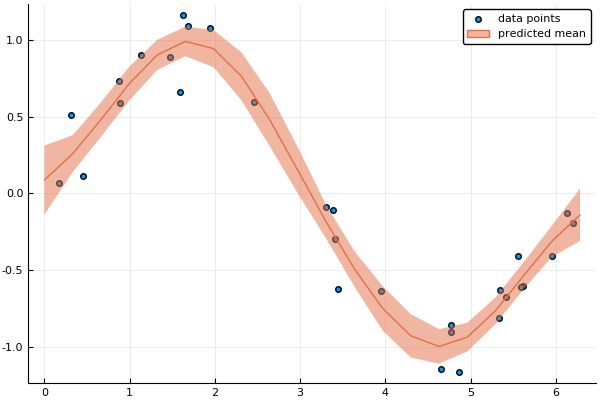

In [35]:
plot(gp, X_pred)